In [1]:
import warnings
from carbonplan.data import cat
import xarray as xr
import matplotlib.pyplot as plt
from carbonplan.styles import colors
from carbonplan.styles.mpl import light  # carbonplan_dark

warnings.filterwarnings("ignore")


In [2]:
c = colors(mode='light')

In [22]:
def load_gridmet(var):
    
    ds_list = []
    
    for year in range(1979, 2021):  # start: 1979
        url  = f'http://thredds.northwestknowledge.net:8080/thredds/dodsC/MET/{var}/{var}_{year}.nc'
        ds = xr.open_dataset(url, engine='pydap').sel(lon=-121.2683, lat=44.7603, method='nearest').load()
        if 'day' in ds.coords:
            ds = ds.rename({'day': 'time'})
            
        ds_list.append(ds)
        
    return xr.concat(ds_list, dim='time')
        

In [23]:
temp = []
for var in ['fm1000', 'bi', 'tmmx', 'tmmn']:
    ds = load_gridmet(var)
    if 'air_temperature' in ds:
        ds = ds.rename({'air_temperature': var})
    temp.append(ds)
    
ds = xr.merge(temp)

ds['tmean'] = (ds['tmmx'] + ds['tmmn']) / 2

In [25]:
ds

<xarray.Dataset>
Dimensions:                    (crs: 1, time: 15233)
Coordinates:
    lon                        float64 -121.3
    lat                        float64 44.78
  * crs                        (crs) float32 3.0
  * time                       (time) datetime64[ns] 1979-01-01 ... 2020-09-14
Data variables:
    dead_fuel_moisture_1000hr  (time) float32 24.800001 24.7 ... 7.7000003
    burning_index_g            (time) float32 19.0 16.0 20.0 ... 60.0 58.0 54.0
    tmmx                       (time) float32 263.0 268.0 264.8 ... 297.2 301.8
    tmmn                       (time) float32 248.7 255.4 257.0 ... 280.5 281.1
    tmean                      (time) float32 255.85 261.7 ... 288.85 291.45

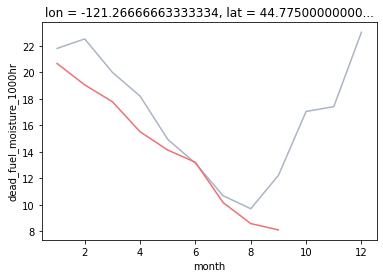

In [21]:
ds['dead_fuel_moisture_1000hr'].groupby('time.month').mean().plot(c=c['grey'])
ds['dead_fuel_moisture_1000hr'].sel(time=slice('2020', None)).groupby('time.month').mean().plot(c=c['red'])

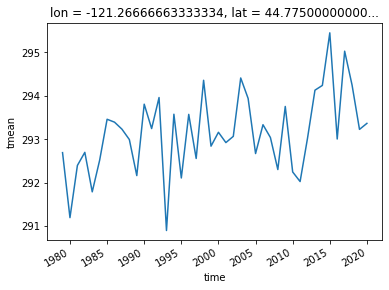

In [40]:
.plot()

In [47]:
list(ds.keys())

['dead_fuel_moisture_1000hr', 'burning_index_g', 'tmmx', 'tmmn', 'tmean']

In [41]:
import seaborn as sns

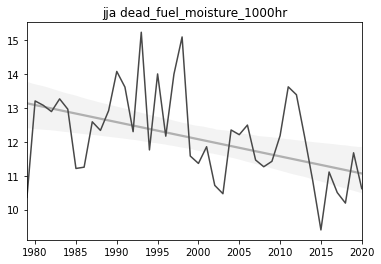

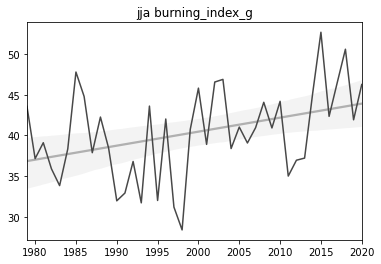

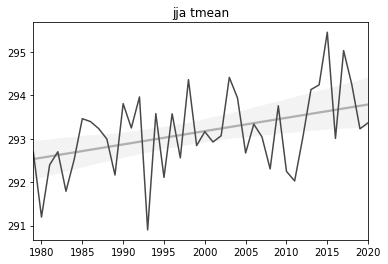

In [56]:
jja = ds['time.season'] == 'JJA'

for var in ['dead_fuel_moisture_1000hr', 'burning_index_g', 'tmean']:
    plt.figure()
    data = ds[var].where(jja).resample(time='AS').mean()
    sns.regplot(x=data['time.year'].values, y=data.values, robust=True, scatter=False, color=c['secondary'])   
    sns.lineplot(x=data['time.year'].values, y=data.values, color=c['primary'])
    plt.title('jja ' + var)